<a href="https://colab.research.google.com/github/sydoky/-CNN-exercises/blob/main/CNN_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Getting The data Path
data_dir="/content/drive/MyDrive/CNN dataset"
cats_path="/content/drive/MyDrive/CNN dataset/cats"
dogs_path="/content/drive/MyDrive/CNN dataset/dogs"

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1/255., validation_split=0.3) #create a validation split in the train data to split 30% for validation and the rest 70% for test


train_data=train_datagen.flow_from_directory(data_dir,
                                             batch_size=2,
                                             target_size=(200,200),
                                             class_mode="binary",
                                             seed=42,
                                             subset="training")
valid_data=train_datagen.flow_from_directory(data_dir,
                                             batch_size=2,
                                             target_size=(200,200),
                                             class_mode="binary",
                                             seed=42,
                                             subset="validation")


Found 14 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


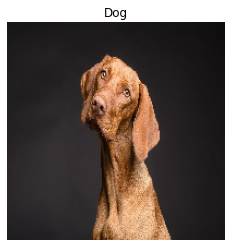

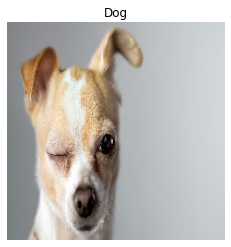

In [4]:
#let's do some visualization
x,y=train_data.next()
for i in range(2):
  image=x[i]
  label=y[i]
  plt.axis(False)
  if label==1.0:
    label="Dog"
  else:
    label="Cat"
  plt.title(label)
  plt.imshow(image)
  plt.show()

In [5]:
#Now I need to build a CNN model
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(200,200,3)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid") #softmax we have to use with multiclass
])
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(train_data,
                      epochs=20,
                       steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/20
7/7 [==============================] - 8s 988ms/step - loss: 1.4206 - accuracy: 0.6429 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 1s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 1s 170ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 1s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 1s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/20
7/7 [====

In [6]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(200,200,3)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid") #softmax we have to use with multiclass
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                      epochs=20,
                       steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/20
7/7 [==============================] - 2s 209ms/step - loss: 2.5489 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 1s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 1s 159ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 1s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 1s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
7/7 [====

In [7]:
from tensorflow.python.keras.backend import flatten
#Create a CNN Model
model_3=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu",
                                                           input_shape=(200,200,3)),
                                  
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")]) # binary activation output

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                      epochs=20,
                      validation_data=valid_data)
            

Epoch 1/20
7/7 [==============================] - 2s 221ms/step - loss: 3.1855 - accuracy: 0.2143 - val_loss: 5.0904 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 181ms/step - loss: 1.4225 - accuracy: 0.7143 - val_loss: 1.9285 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 171ms/step - loss: 1.7615 - accuracy: 0.5714 - val_loss: 1.5284 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 1s 191ms/step - loss: 0.6178 - accuracy: 0.7857 - val_loss: 1.1694 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 2s 367ms/step - loss: 0.2362 - accuracy: 0.9286 - val_loss: 0.9979 - val_accuracy: 0.6667
Epoch 6/20
7/7 [==============================] - 2s 242ms/step - loss: 0.1773 - accuracy: 0.8571 - val_loss: 1.7383 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 2s 260ms/step - loss: 0.3654 - accuracy: 0.8571 - val_loss: 0.8832 - val_accuracy: 0.5000
Epoch 8/20
7/7 [====

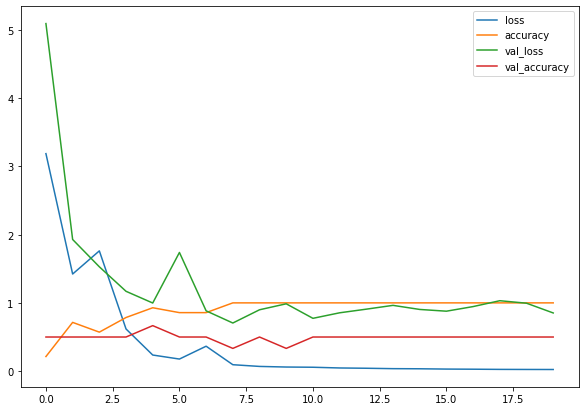

In [8]:
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7));

In [9]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

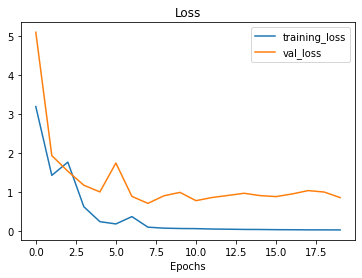

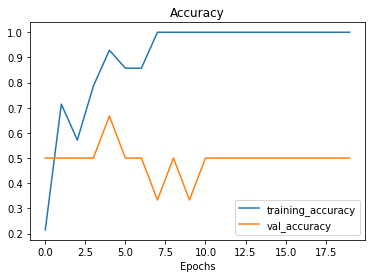

In [10]:
plot_loss_curves(history_3)

In [23]:
from gc import callbacks
#Finding the ideal learning rate

#Create a learning rate scheduler callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_learning_rate=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu",
                                                           input_shape=(200,200,3)),
                                  
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

model_learning_rate.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4=model_learning_rate.fit(train_data,
                      epochs=10,
                      validation_data=valid_data,
                      callbacks=[lr_scheduler])


Epoch 1/10
7/7 [==============================] - 2s 231ms/step - loss: 0.7190 - accuracy: 0.4286 - val_loss: 0.6577 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/10
7/7 [==============================] - 1s 187ms/step - loss: 0.7103 - accuracy: 0.5000 - val_loss: 0.7469 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/10
7/7 [==============================] - 1s 166ms/step - loss: 0.6788 - accuracy: 0.5000 - val_loss: 0.6725 - val_accuracy: 0.6667 - lr: 1.2589e-04
Epoch 4/10
7/7 [==============================] - 1s 188ms/step - loss: 0.7021 - accuracy: 0.6429 - val_loss: 0.6386 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/10
7/7 [==============================] - 1s 189ms/step - loss: 0.6470 - accuracy: 0.5714 - val_loss: 0.6536 - val_accuracy: 0.8333 - lr: 1.5849e-04
Epoch 6/10
7/7 [==============================] - 1s 187ms/step - loss: 0.6154 - accuracy: 0.8571 - val_loss: 0.6836 - val_accuracy: 0.6667 - lr: 1.7783e-04
Epoch 7/10
7/7 [==============================] - 1s 189ms

Text(0.5, 1.0, 'Learning rate vs. loss')

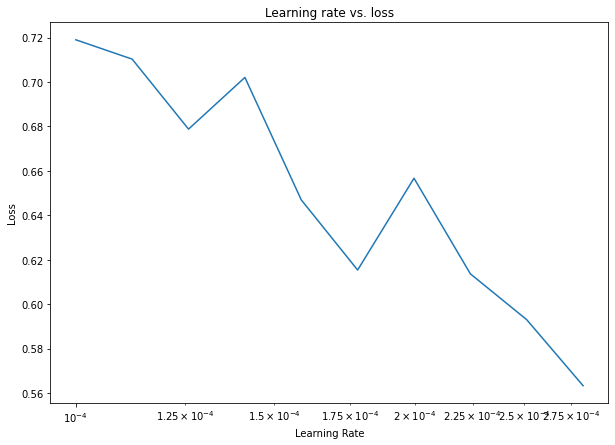

In [24]:
#Plot the learning rate versus the loss
lrs=1e-4 * (10**(np.arange(10)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [25]:
# The learning rate is 0.0002
from tensorflow.python.keras.backend import flatten
#Create a CNN Model
model_5=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu",
                                                           input_shape=(200,200,3)),
                                  
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    
                                    tf.keras.layers.Conv2D(filters=2,
                                                           kernel_size=1,
                                                           activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=1,
                                                              padding="valid"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")]) # binary activation output

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                metrics=["accuracy"])

history_7=model_5.fit(train_data,
                      epochs=20,
                      validation_data=valid_data)

Epoch 1/20
7/7 [==============================] - 2s 240ms/step - loss: 0.6932 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 1s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 1s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 1s 172ms/step - loss: 0.6932 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 1s 186ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
7/7 [====